# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 0303 Смирнов Артем и Переверза Михаил. Вариант №2.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

**Дискретный сигнал**

Дискретный сигнал:

$$x_0, x_1, ..., x_{N-1}$$

как правило, получается при дискретизации аналогового (определенного во все моменты времени) сигнала $s(t)$.

Будем считать, что отчёты $x_k, k = 0,1,...,N - 1$ дискретного сигнала получены в результаты равномерной дискретизации сигнала $s(t)$ с шагом дискретизации, равным единице:

$$x_k = s(t_k), k = 0, 1, ..., N - 1;$$

$$t_k - t_{k-1} = T, k = 1, ..., N - 1; T = 1.$$

**Дискретное преобразование Фурье**

Пусть последовательность отсчётов $\{x_k\}$ является периодической с периодом $N$:
$$x_{k+N} = x_k \forall k$$
Расcмотрим фрагмент последовательности из $N$ отсчётов. Например, $\{x_k: k = 0,1,2,...,N-1\}$. Тогда дискретная функция

$$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - kT)$$

тоже будет периодической с периодом $NT$. Здесь $T$ - период дискретизации.

Спектр $s(t)$ также должен быть периодическим (с периодом $\frac{2\pi}{T}$) и дискретным с расстоянием между гармониками $\frac{2\pi}{NT}$. Один период спектра содержит $N$ гармоник.

Поскольку $s(t)$ - периодическая функция, её можно разложить в ряд Фурье, коэффициенты которого вычисляются по формуле:

$$X(n) = \frac{1}{NT}\sum_{k=0}^{N-1} x_k e^{-i\frac{2\pi n}{N}k}$$

После удаления множителя перед суммой получается выражение, называемое дискретным преобразование Фурье:

$$X(n) = \sum_{k=0}^{N-1} x_k e^{-i\frac{2\pi n}{N}k}, n = 0,1,2,...,N-1$$

**Спектр дискретного сигнала**

Представим дискретный сигнал в виде функции от времени:

$$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - k)$$

Пользуясь свойствами преобразования Фурье, спектр дискретного сигнала можно представить в виде периодической функции с периодом, равным $2\pi$:

$$S(\omega) = \sum_{k=-\infty}^{\infty} x_k e^{-i\omega k}$$

Из сравнения этой формулы с формулой ДПФ следует, что ДПФ вычисляет дискретные отсчеты спектра дискретного сигнала:

$$X(n) = S(\frac{2\pi n}{N}) = S(ω_d \frac{n}{N}), T = 1$$

С другой стороны, дискретный сигнал может быть представлен в виде:

$$s_d(t) = \sum_{k=-∞}^∞ s(t)\delta(t-kT) = \frac{1}{T}\sum_{k=-\infty}^{\infty} s(t)e^{i\omega_k t}$$

а его спектр:
$$S_d(\omega) = \frac{1}{T} \sum_{k=-\infty}^{\infty} S(\omega - \frac{2\pi k}{T})$$

где $\omega_k = \frac{2\pi k}{T}, c_k = \frac{1}{T} ∫_{-\frac{T}{2}}^{\frac{T}{2}} \delta(t)e^{-i\omega_k t}dt = \frac{1}{T}$

**Теорема Котельникова**

Сигнал $s(t)$, не содержащий гармоник с частотами, превышающими некоторого значения $\widehat{\omega} = 2\pi \widehat{f}$, может быть представлен без потери информации своими дискретными отсчётами $s(kT)$, удовлетворяющим условию:

$$T \le \frac{1}{2\widehat{f}} = \frac{\pi}{\widehat{\omega}}$$

Восстановдение исходного сигнала осуществляется по формуле:

$$s(t) = \sum_{k=-\infty}^{\infty} s(kT)\varphi_k(t)$$

где $\varphi_k(t) = \frac{sin(\pi\frac{t - kT}{T})}{(\pi\frac{t - kT}{T})}$ - базис Котельникова.

**Формула трапеций**

$$ y_{n+1} = y_n + \frac {1}{2} (s_n + s_{n+1}), y_0 = 0 $$


**Формула прямоугольников**

$$ y_{n+1} = y_n + s_{n + \frac {1}{2}}, y_0 = 0 $$


**Формула Симпсона**

$$ y_{n+1} = y_{n-1} + \frac {1}{3}(s_{n-1}+4s_n+s_{n+1}), y_0 = 0 $$


## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.



## Выполнение работы

Импортируем необходимые библиотеки:

In [18]:
# установкап необходимых зависимостей

# нужно, т.к. версия питону в колабе 3.9
!pip install StrEnum

In [19]:

# импорт зависимостей

from collections.abc import Iterable, Sequence, Callable
from dataclasses import dataclass, field
from functools import cached_property
from itertools import chain
from typing import Any, Union

import matplotlib.pyplot as plt
import numpy as np
from strenum import StrEnum

Определим функцию для отрисовки графиков

In [20]:
@dataclass
class Range:
    start: float
    """Начало промежутка"""
    stop: float
    """Конец промежутка"""


@dataclass
class Graphic:
    """Конкретный график"""

    plot_function: Callable
    """Функция отрисовки"""
    label: str = ''
    """label для графика"""
    y_function: Union[Callable, None] = None
    """Функция генерации y от x"""
    x: Sequence | None = None
    """x для конкретного графика"""
    y: Sequence | None = None
    plot_kwargs: dict[str, Any] = field(default_factory=dict)
    """kwargs для передачи в функцию отрисовки"""

    def plot(self, x: Sequence, color: str, **kwargs):
        """Отрисовка конкретного графика"""

        x = self.x if self.x is not None else x
        y = self.y if self.y is not None else self.y_function(x)

        # Выбор названия кварга, отвечающего за цвет графика
        # оно меняется, в зависимости от функции отрисовки в pyplot
        match self.plot_function:
            case plt.stem:
                color_arg = 'linefmt'
            case _:
                color_arg = 'color'

        kwargs.update({color_arg: color})
        kwargs.update(self.plot_kwargs)
        self.plot_function(x, y, label=self.label, **kwargs)


@dataclass
class GraphicsBlock:
    """Блок графиков, отображаемый на одной плитке"""

    graphics: list[Graphic]
    """Отображаемые блоки"""
    x: Sequence | None = None
    """x для блока графиков"""
    title: str = ''
    """title блока"""
    x_label: str = ''
    """Подпись к графику по x"""
    y_label: str = ''
    """Подпись к графику по x"""
    x_lim: Range | None = None
    """Ограничение графика по x"""
    y_lim: Range | None = None
    """Ограничение графика по y"""


def print_graphic(graphic_blocs: Iterable[GraphicsBlock]):
    """Отображение нескольких блоков графиков"""

    plt.figure(figsize=(20, 10))
    colors = ['blue', 'red', 'green', 'pink', 'orange']

    # перебор "прилиток" графиков
    block: GraphicsBlock

    for i, block in enumerate(graphic_blocs, start=1):
        color_index = 0

        plt.subplot(len(graphic_blocs), 1, i)
        plt.tight_layout()

        # установка ограничений по осям
        if block.x_lim:
            plt.xlim(block.x_lim.start, block.x_lim.stop)
        if block.y_lim:
            plt.ylim(block.y_lim.start, block.y_lim.stop)

        # перебор конкретных графиов в плитке
        graphic: Graphic
        for j, graphic in enumerate(block.graphics):
            graphic.plot(x=block.x, color=colors[color_index])
            color_index += 1

        # задание оформления блоку
        plt.legend()
        plt.xlabel(block.x_label)
        plt.ylabel(block.y_label)
        plt.title(block.title)
        plt.grid()

    plt.show()

### Задание 1. Формирование дискретного сигнала посредством дискретизации непрерывного сигнала, представляющего собой линейную комбинацию косинусоидов.

Сформируем дискретный сигнал $x_0, x_1, x_2, … , x_{N}$ посредством
дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой
линейную комбинацию косинусоид вида $A_k\cos({\omega}_kt+{\varphi}_k)$, где:

1. Частота каждой из гармоник не превышает $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом  $\Delta \omega=0.1\pi$.
2. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1
до 11, определяемые случайным образом с помощью датчика равномерно
распределенных случайных чисел.
3. Начальные фазы ${\varphi}_k$ представляют собой случайные числа в промежутке от 0 до 0.5.
4. Дискретная последовательность должна включать в себя 32 отсчета (N = 31).

При необходимости нормализуем коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд.

Итого, имея $$s(t) = \sum_{k=0}^{10} A_k cos(\omega_k t + \varphi_k)$$ - линейную комбинацию косинусоид, сформируем дискретный сигнал:

$$x_k = s(t_k), k = 0, 1, ..., N;$$

$$t_k - t_{k-1} = T, k = 1, ..., N; T = 1.$$

In [21]:
# инициализируем переменные
k = 11
T = 1
delta_w = 0.1 * np.pi
A_low, A_high = 1, 11
phi_low, phi_high = 0, 0.5
N = 31


A_k = np.random.randint(A_low, A_high + 1, k)
A_k = A_k / A_k.sum()

phi_k = np.random.uniform(phi_low, phi_high, k)

w_k = np.arange(0, np.pi + 0.000001, delta_w)

In [22]:
def s(t: np.ndarray) -> np.ndarray:
    """Дискретный сигнал"""

    t = t.copy()
    t.shape = t.shape + (1,)
    return np.sum(A_k * np.cos(w_k * t + phi_k), axis=1)

### Задание 2. Визуализация исходных аналогового и дискретизированного сигналов.

Визуализируем исходные аналоговый и дискретизированный сигналы.

In [23]:
# последовательности t для построения исходного сигнала
task1_analog_size = 2000
task1_t_a = np.linspace(0, N, task1_analog_size)
task1_t_d = np.linspace(0, N, N + 1)

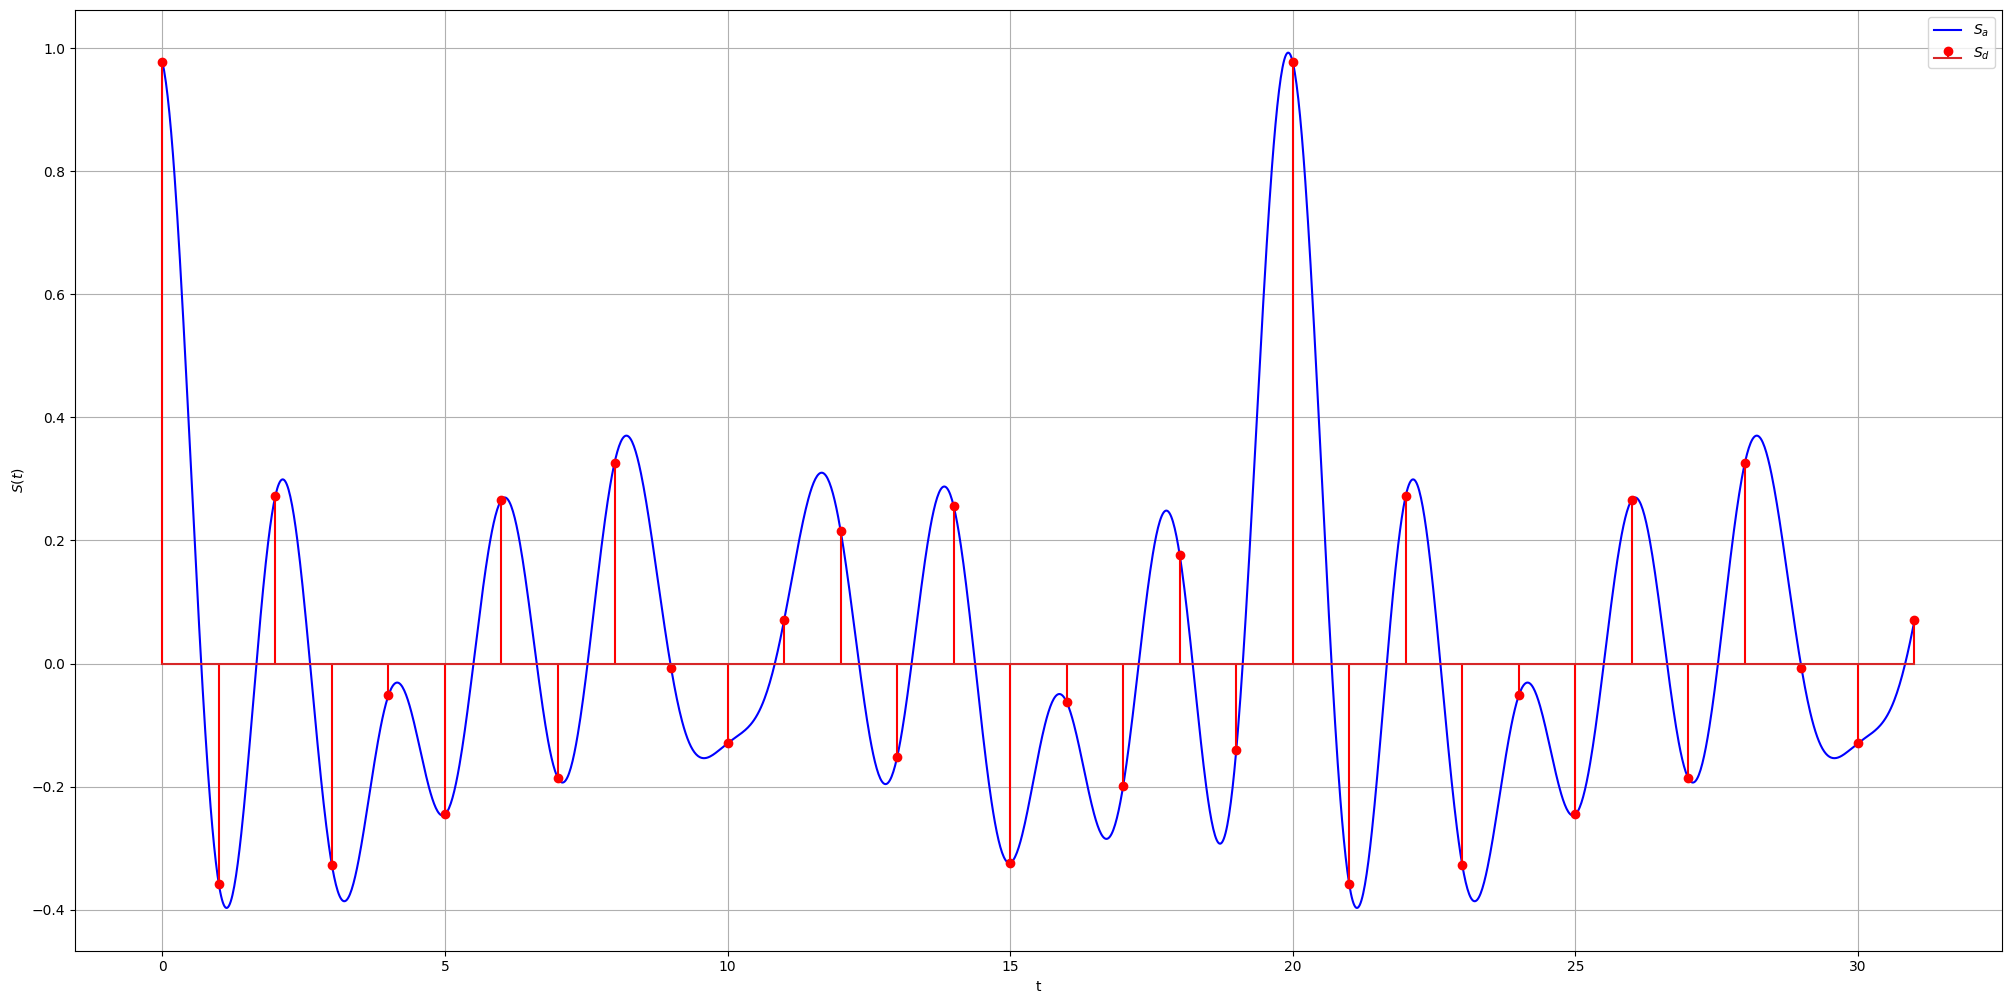

In [24]:
print_graphic(
    graphic_blocs=[
        GraphicsBlock(
            graphics=[
                Graphic(
                    plot_function=plt.plot,
                    x=task1_t_a,
                    # исходный аналоговый сигнал
                    y_function=s,
                    label=r'$S_{a}$',
                ),
                Graphic(
                    plot_function=plt.stem,
                    x=task1_t_d,
                    # исходный дискретный сигнал
                    y_function=s,
                    label=r'$S_{d}$',
                ),
            ],
            x_label='t',
            y_label=r'$S(t)$',
        ),
    ],
)


Сигнал является периодическим с периодом $N = 20$.

### Задание 3. Нахождение дискретных отсчетов спектра дискретного сигнала с помощью ДПФ и их визуализация.

С помощью ДПФ найдем дискретные отсчеты спектра дискретного сигнала и визуализируем их.


In [25]:
# данные для задания 3
task3_N = N
task3_t_d = task1_t_d[:task3_N + 1]

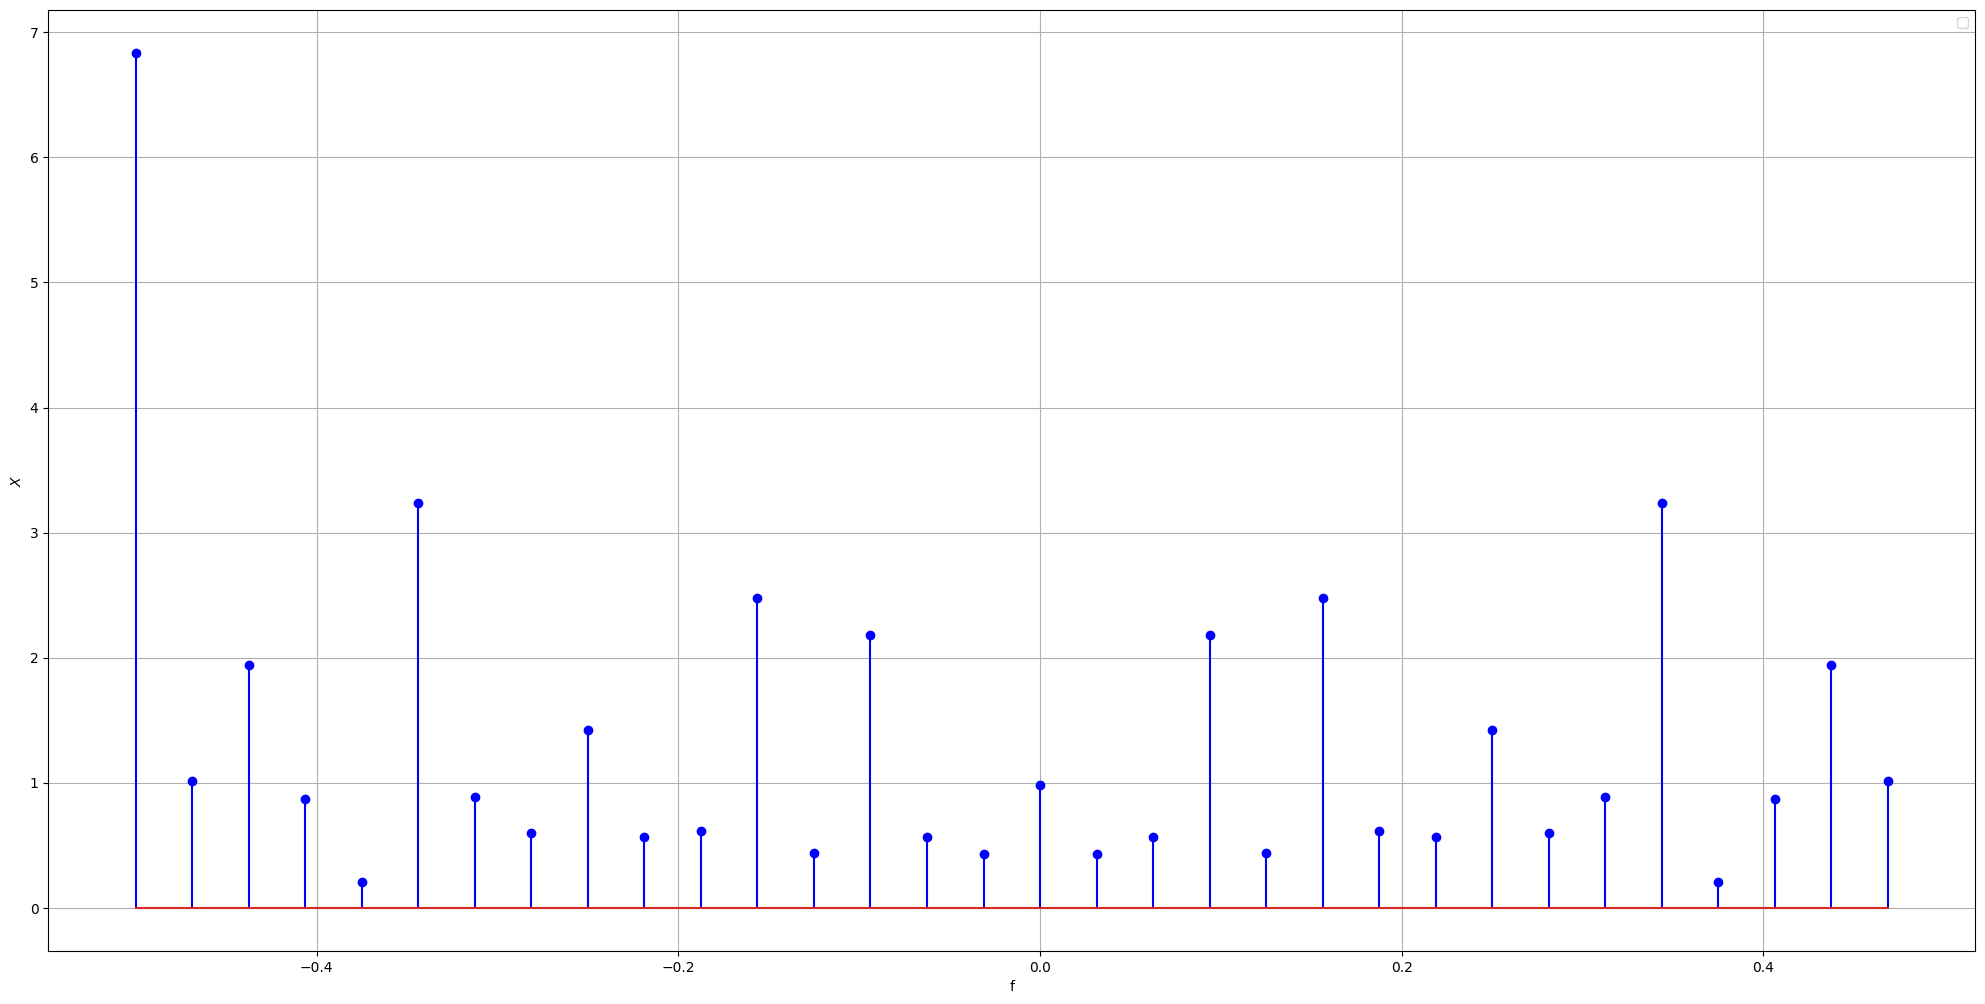

In [26]:
print_graphic(
    graphic_blocs=[
        GraphicsBlock(
            graphics=[
                Graphic(
                    plot_function=plt.stem,
                    x=np.fft.fftfreq(task3_N + 1, T),
                    y=abs(np.fft.fft(s(task3_t_d))),
                ),
            ],
            x_label='f',
            y_label=r'$X$',
        ),
    ],
)

### Задание 4. Линейное сглаживание по 5-ти и 9-ти точкам для дискретного сигнала, нахождение формулы для $H(\omega)$ – передаточной функции фильтра.

Для дискретного сигнала применим линейное сглаживание по 5-ти и 9-ти точкам.

В общем случае для линейного сглаживания по $2m+1$ точкам справедливо:

$$y_n = \frac{1}{2m+1} \sum_{k=n-m}^{k=n+m}s_k = \frac{1}{2m+1} (s_{n-m} + ... + s_{n-1} + s_n + s_{n+1} + ... + s_{n+m})$$

$$H(ω) = \frac{1}{2m+1}[1 + 2cos(ω) + 2cos(2ω) + ... + 2cos(mω)]$$

Получаем:

$y_{n,5} = \frac{1}{5} \sum_{k=n-2}^{n+2}x_k$

$y_{n,9} = \frac{1}{9} \sum_{k=n-4}^{n+4}x_k$


Передаточные функции для 5-ти и 9-ти точек:

$H_5(ω) = \frac{1}{5} [1 + 2cos(ω) + 2cos(2ω)]$

$H_9(ω) =\frac{1}{9} [1 + 2cos(ω) + 2cos(2ω) + 2cos(3ω) + 2cos(4ω)]$

### Задание 5. Визуализация полученного после фильтрации дискретного сигнала совместно с исходным дискретным сигналом.

Визуализируем полученный после фильтрации дискретный сигнал
совместно с исходным дискретным сигналом.

In [27]:
# данные для 5 задания
task5_t_d = task1_t_d

In [28]:
def h_task_5(t: np.ndarray, m: int) -> np.ndarray:
    return np.convolve(t, np.ones(m), 'same') / m

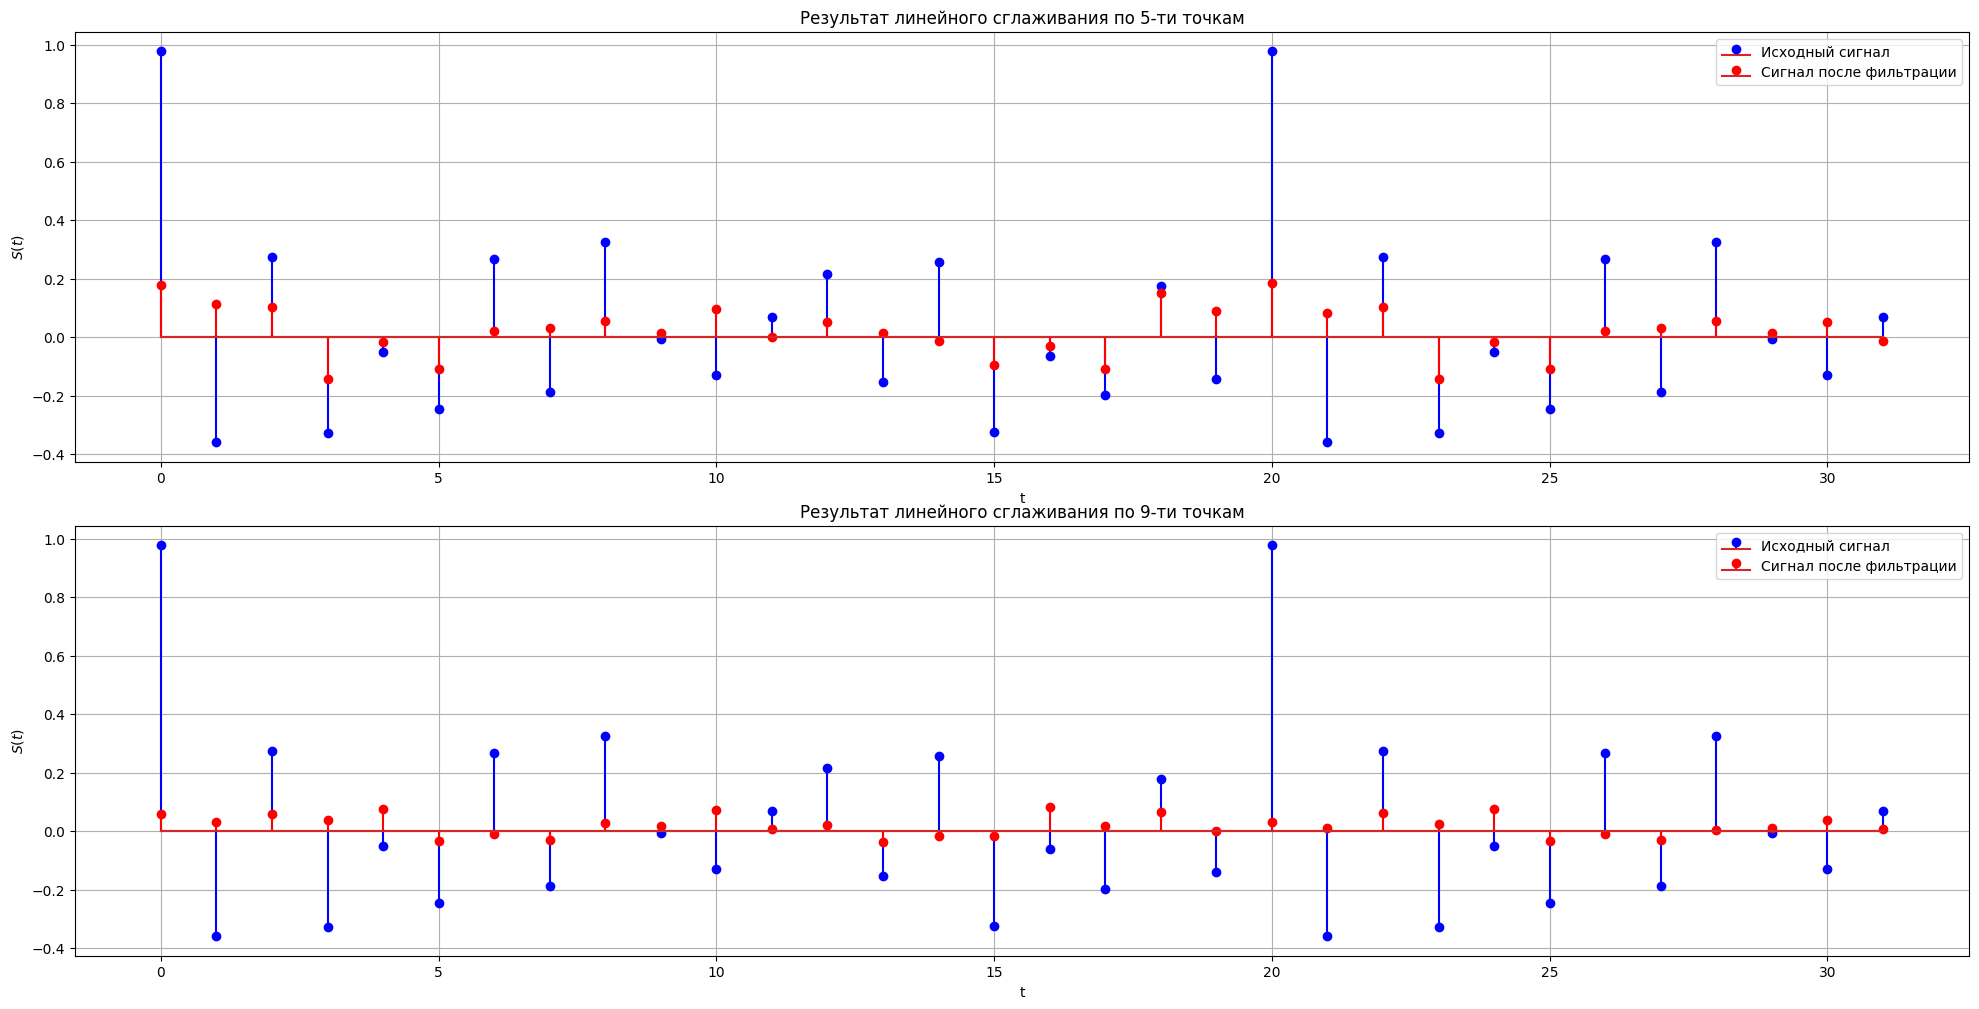

In [29]:
# построение графиков для 5 и 9 точек сглаживания
print_graphic(
    graphic_blocs=[
        GraphicsBlock(
            graphics=[
                Graphic(
                    plot_function=plt.stem,
                    x=task5_t_d,
                    y_function=s,
                    label=r'Исходный сигнал',
                ),
                Graphic(
                    plot_function=plt.stem,
                    x=task5_t_d,
                    y=h_task_5(s(task5_t_d), m),
                    label='Сигнал после фильтрации',
                )
            ],
            title=f'Результат линейного сглаживания по {m}-ти точкам',
            x_label='t',
            y_label=r'$S(t)$',
        )
        for m in (5, 9)
    ],
)

### Задание 6. Нахождение дискретных отсчетов спектра дискретного сигнала после его фильтрации с помощью ДПФ и визуализация их совместно с отчетами спектра исходного дискретного сигнала.

С помощью ДПФ найдём дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализируем их совместно с отчетами спектра исходного дискретного сигнала.

In [30]:
# данные для 6 задания
task6_t_d = task1_t_d
task6_N = N

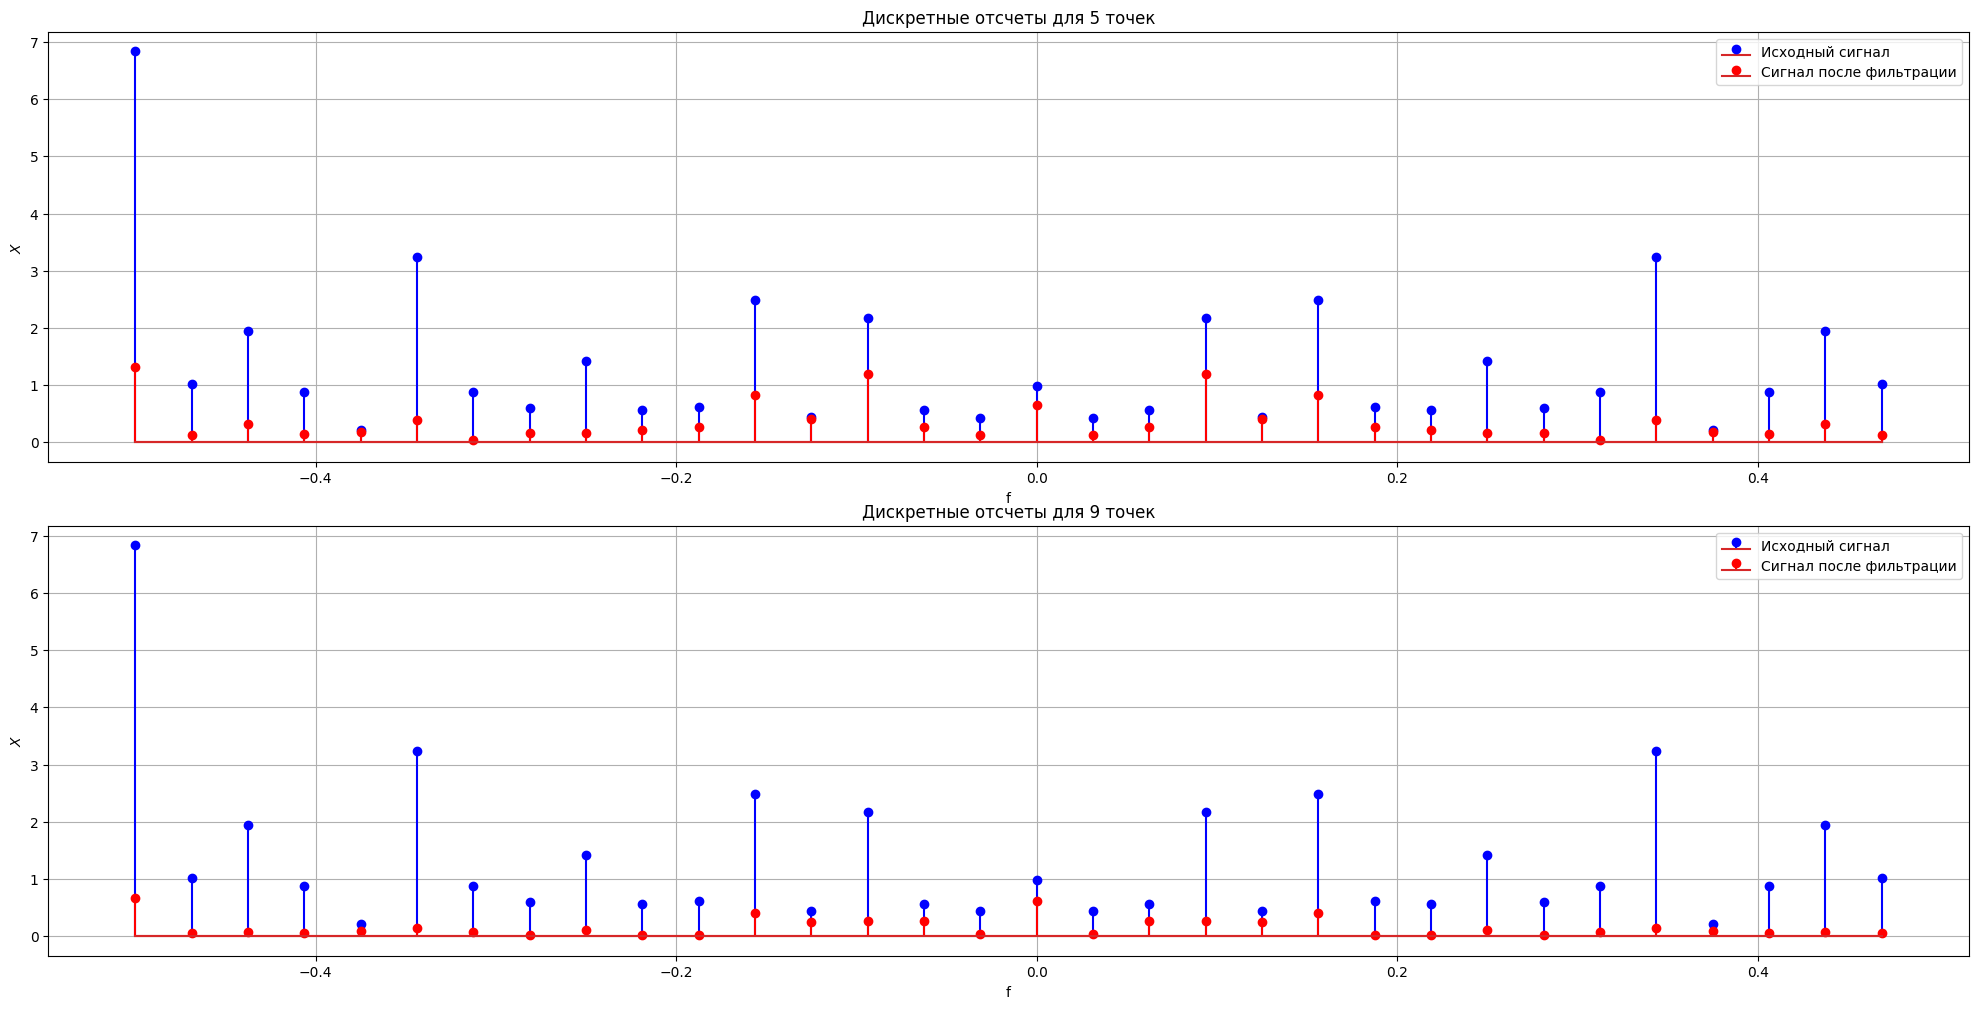

In [31]:
# построение графиков дискретных отсчетов
print_graphic(
    graphic_blocs=[
        GraphicsBlock(
            graphics=[
                Graphic(
                    plot_function=plt.stem,
                    # разложение в спектр
                    x=np.fft.fftfreq(task6_N + 1, T),
                    # преобразование фурье над базовым сигналом
                    y=abs(np.fft.fft(s(task6_t_d))),
                    label=r'Исходный сигнал',
                ),
                Graphic(
                    plot_function=plt.stem,
                    # разложение в спектр
                    x=np.fft.fftfreq(task6_N + 1, T),
                    # преобразование фурье над сигналом после линейной фильтрации
                    y=abs(np.fft.fft(h_task_5(s(task6_t_d)  , m))),
                    label='Сигнал после фильтрации',
                )
            ],
            title=f'Дискретные отсчеты для {m} точек',
            x_label='f',
            y_label=r'$X$',
        )
        for m in (5, 9)
    ],
)

### Задание 7. Анализ полученного результата на соответствие значениям  $H(\omega)$.

По полученным результатам можно сделать выводы от том, что:

1. Увеличение числа точек приводит к увеличению крутизны спада.
2. Полоса пропускания частот, наоборот, имеет обратную зависимость от количества точек.

Полученные результаты соответствуют значениям  $H(\omega)$.

### Задание 8. Повторение п. 4–7 для следующих фильтров:

In [32]:
# данные для 8 задания

# последовательность t
task8_t_d = task1_t_d
task8_N = N


def num_diff_power1(t: np.ndarray) -> np.ndarray:
    """Численное дифференцирование 1-го порядка"""

    reduced = np.roll(t, -1)
    reduced[-1] = 0

    deductible = np.roll(t, 1)
    deductible[0] = 0

    return (reduced - deductible) / 2


def rect(t: np.ndarray) -> np.ndarray:
    """Прямоугольника"""

    t = t + 0.5
    res = s(t)
    res[0] = 0
    res = np.cumsum(res)
    return res


def trap(t: np.ndarray) -> np.ndarray:
    """Трапеции"""

    res = (s(t) + s(t + 1)) / 2
    res[0] = 0
    res = np.cumsum(res)
    return res


def simp(t):
    """Симпсона"""

    res = (s(t - 1) + 4 * s(t) + s(t + 1)) / 3
    res[0] = 0
    kernel = np.ones(len(t))
    kernel[1::2] = 0
    res = np.convolve(res, kernel, mode='full')[:len(t)]
    return res


class BaseH(StrEnum):
    rectangle = 'rectangle'
    """Прямоугольник"""
    trapezoid = 'trapezoid'
    """Трапеция"""
    simpson = 'simpson'
    """Симпсон"""

    @cached_property
    def label(self) -> str:
        return {
            BaseH.rectangle: 'прямоугольников',
            BaseH.trapezoid: 'трапеций',
            BaseH.simpson: 'Симпсона',
        }[self]

    def calc(self, t: np.ndarray) -> np.ndarray:
        return {
            BaseH.rectangle: rect,
            BaseH.trapezoid: trap,
            BaseH.simpson: simp,
        }[self](t)

#### a. Дискретного фильтра, соответствующего численному дифференцированию 1-го порядка.

Аппроксимация производной разностью первого порядка:

$$s_n^{'} = \frac {s_{n+1} - s_{n-1}}{2} $$


$$H(\omega) = \frac {e^{iw} - e^{-iw}}{2} = isin(ω) $$


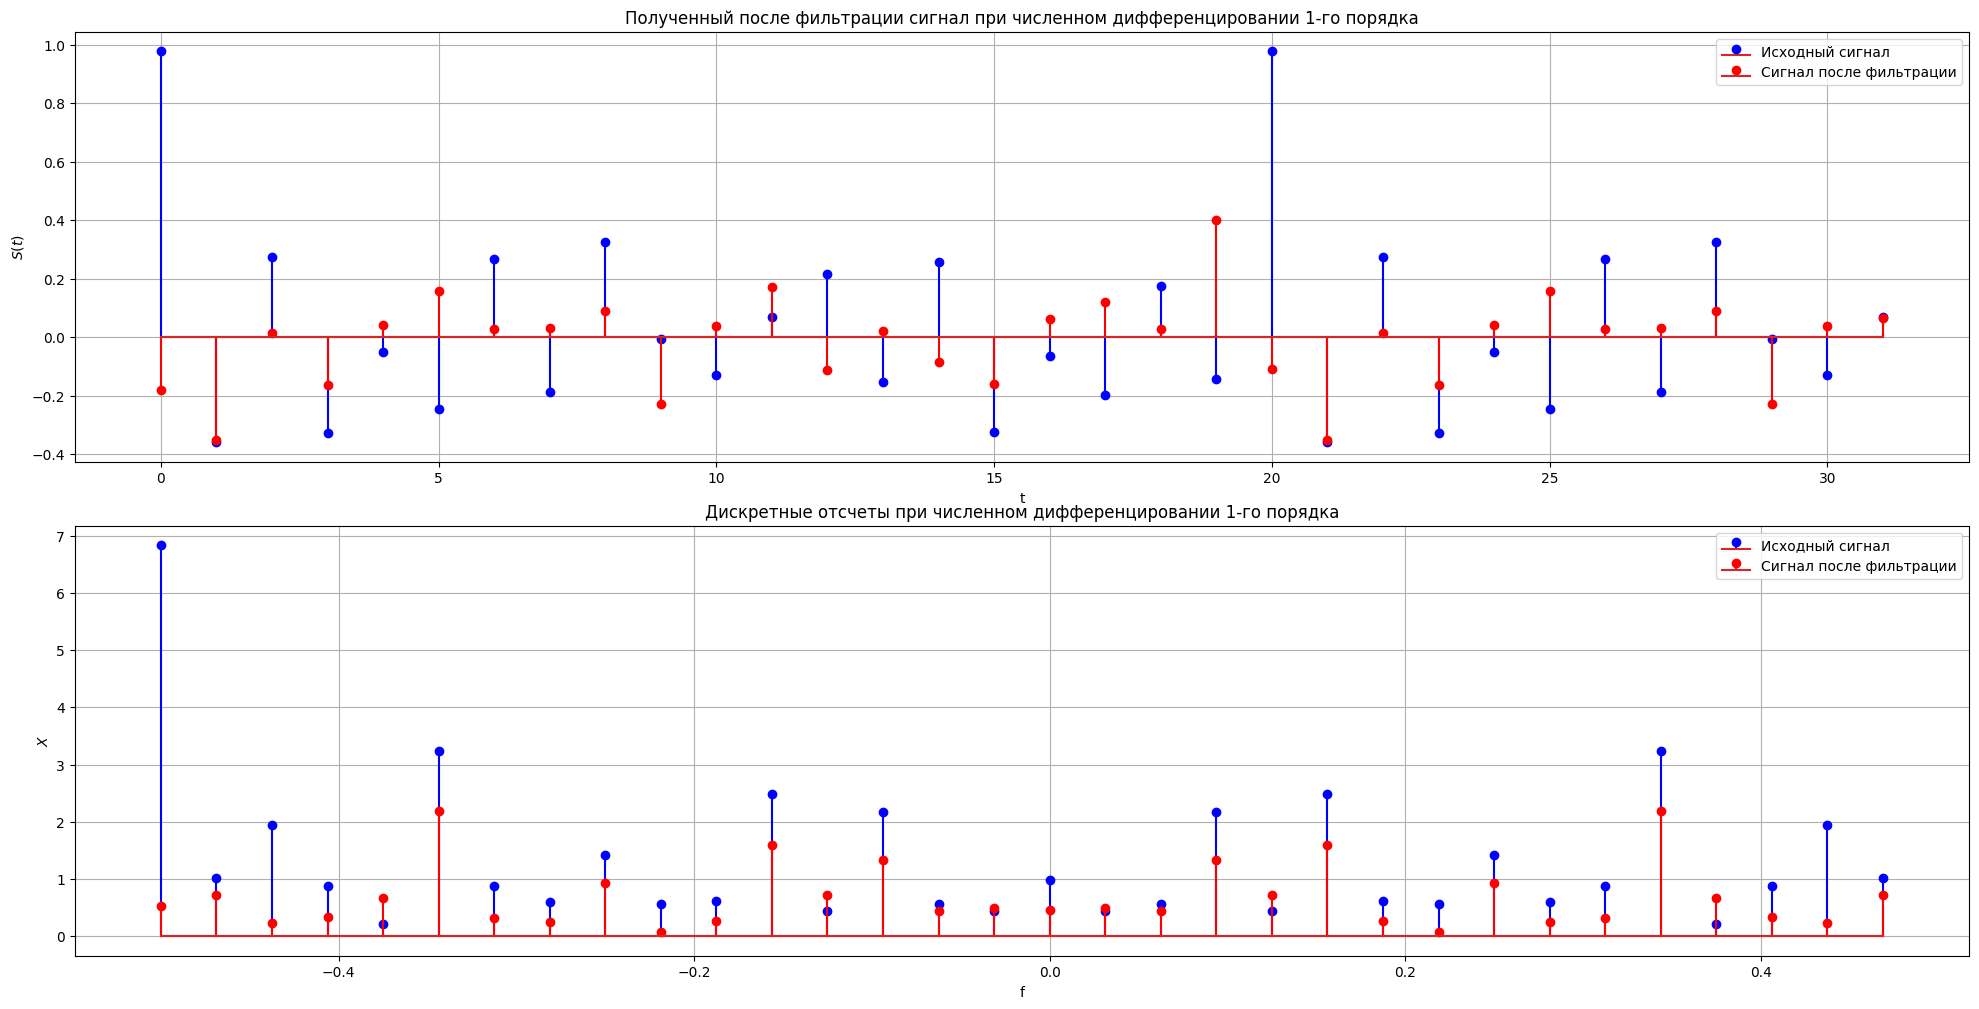

In [33]:
# построение графиков для численного дифференцирования 1-го порядка
print_graphic(
    graphic_blocs=[
        # блок с исходным графиком и его сглаженной версией
        GraphicsBlock(
            graphics=[
                Graphic(
                    plot_function=plt.stem,
                    x=task8_t_d,
                    # базовый сигнал
                    y=s(task8_t_d),
                    label=r'Исходный сигнал',
                ),
                Graphic(
                    plot_function=plt.stem,
                    x=task8_t_d,
                    # фильтрация сигнала
                    y=num_diff_power1(s(task8_t_d)),
                    label=r'Сигнал после фильтрации',
                ),
            ],
            title=f'Полученный после фильтрации сигнал при численном дифференцировании 1-го порядка',
            x_label='t',
            y_label=r'$S(t)$',
        ),
        # блок с дискретными отсчетами спектров исходного и отфильтрованного сигналов
        GraphicsBlock(
            graphics=[
                Graphic(
                    plot_function=plt.stem,
                    # разложение в спектр
                    x=np.fft.fftfreq(task8_N + 1, T),
                    # преобразование фурье над базовым сигналом
                    y=abs(np.fft.fft(s(task8_t_d))),
                    label=r'Исходный сигнал',
                ),
                Graphic(
                    plot_function=plt.stem,
                    # разложение в спектр
                    x=np.fft.fftfreq(task8_N + 1, T),
                    # преобразование фурье над отфильтрованным сигналом
                    y=abs(np.fft.fft(num_diff_power1(s(task8_t_d)))),
                    label='Сигнал после фильтрации',
                )
            ],
            title=f'Дискретные отсчеты при численном дифференцировании 1-го порядка',
            x_label='f',
            y_label=r'$X$',
        )
    ]
)

По полученным результатам можно сделать вывод от том, что использование дискретного фильтра, соответствующего численному дифференцированию 1-го порядка приводит к подавлению низких и высоких частот и сглаживанию средних.

Полученные результаты соответствуют значениям  $H(\omega)$.

#### b. Дискретного фильтра, соответствующего численному интегрированию (прямоугольников, трапеций, Симпсона).

**Для формулы прямоугольников:**

$$y_{n+1} = y_n + s_{n + \frac 1 2}, y_0 = 0$$

$$H(\omega) = \frac {1}{1 - e^{-i\omega}} = \frac 1 {2i \sin {(\frac \omega 2)}}, \tilde {H}(f) = \frac 1 {2i \sin {(\pi f)}}$$

**Для формулы трапеций:**

$$y_{n+1} = y_n + \frac 1 2(s_n + s_{n+1}), y_0 = 0$$

$$H(\omega) =  \frac {(e^{i \omega} + 1)}{2(e^{i \omega} - 1)} = \frac {\cos {(\frac \omega 2)}}{2i \sin {(\frac \omega 2)}}, \tilde {H}(f) = \frac {\cos {(\pi f)}}{2i \sin {(\pi f)}}$$

**Для формулы Симпсона:**

$$y_{n+1} = y_{n-1} + \frac 1 3 (s_{n-1} + 4s_n + s_{n+1}),y_0 = 0$$

$$H(\omega) =  \frac {(e^{i \omega} + 4 + e^{-i \omega})}{3(e^{i \omega} - e^{-i \omega})} = \frac {\cos {(\omega)} + 2}{3i \sin {(\omega)}}, \tilde {H}(f) = \frac {\cos {(2 \pi f)} + 2}{3i \sin {(2 \pi f)}}$$

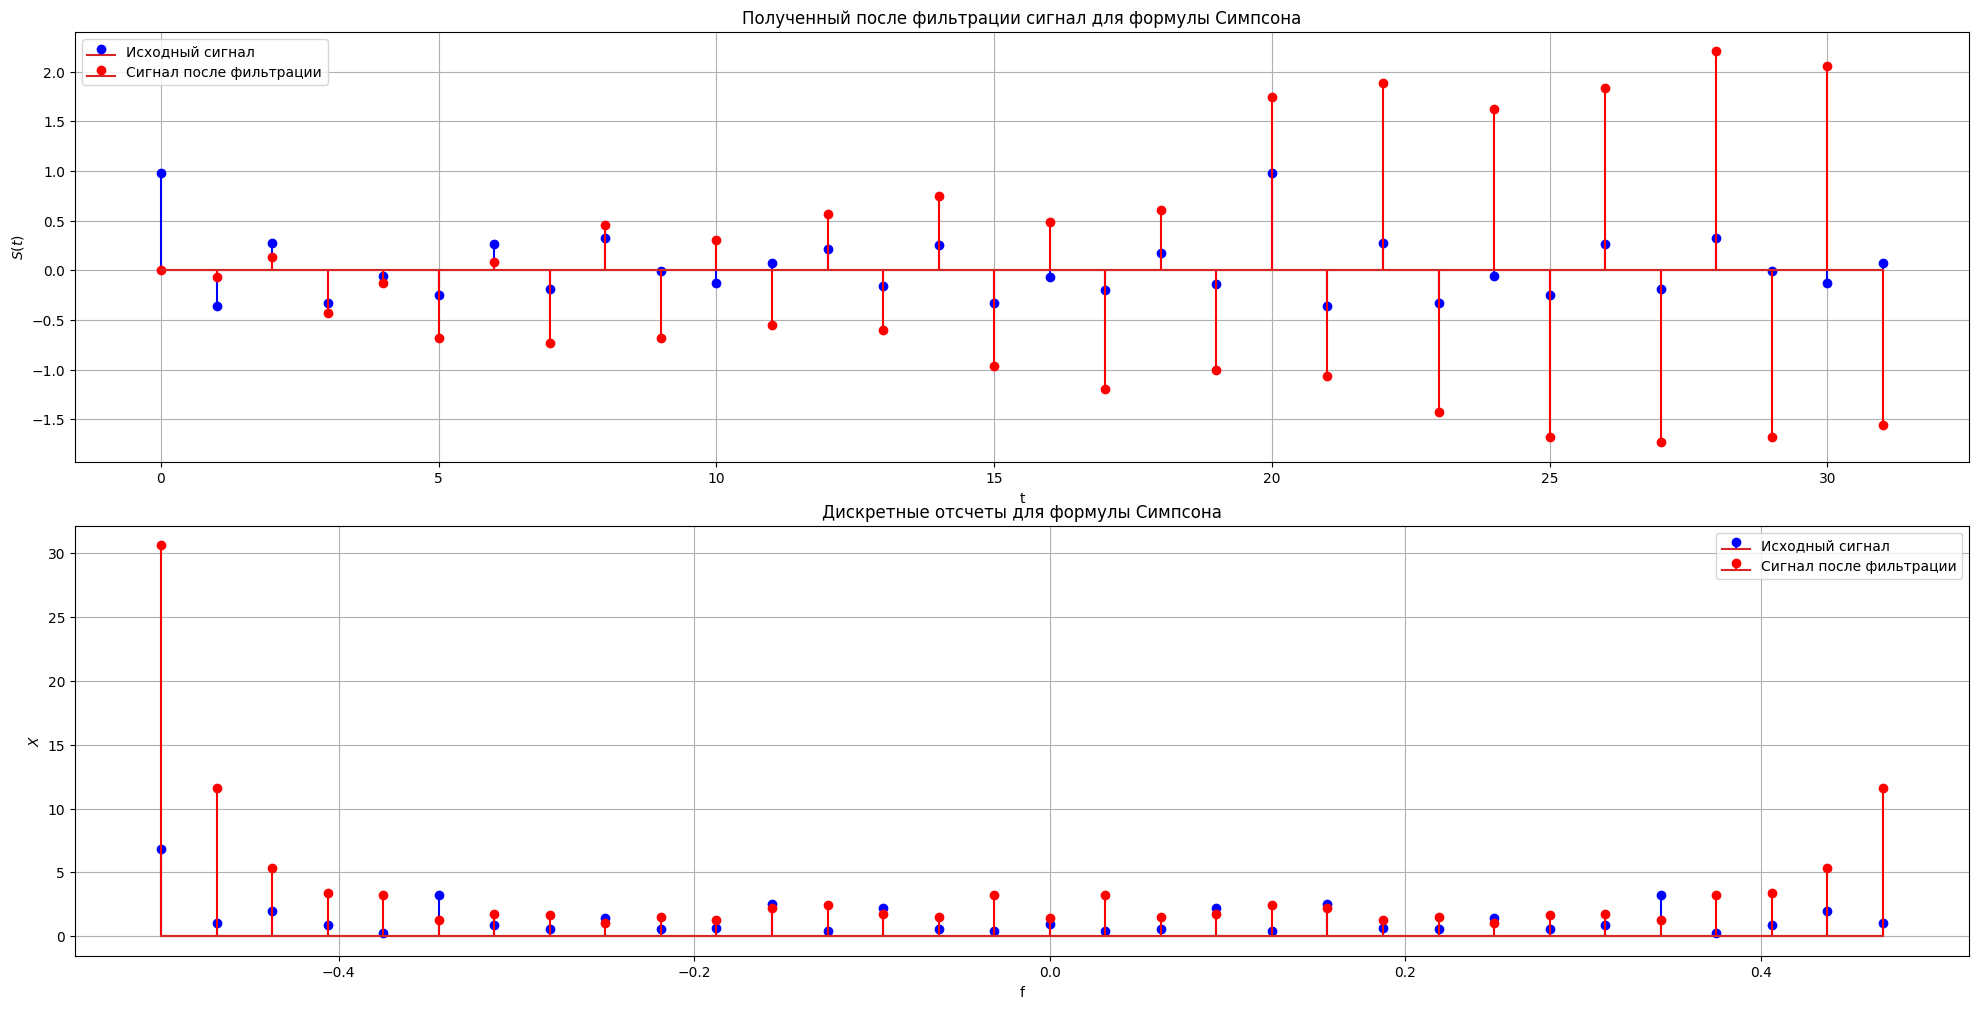

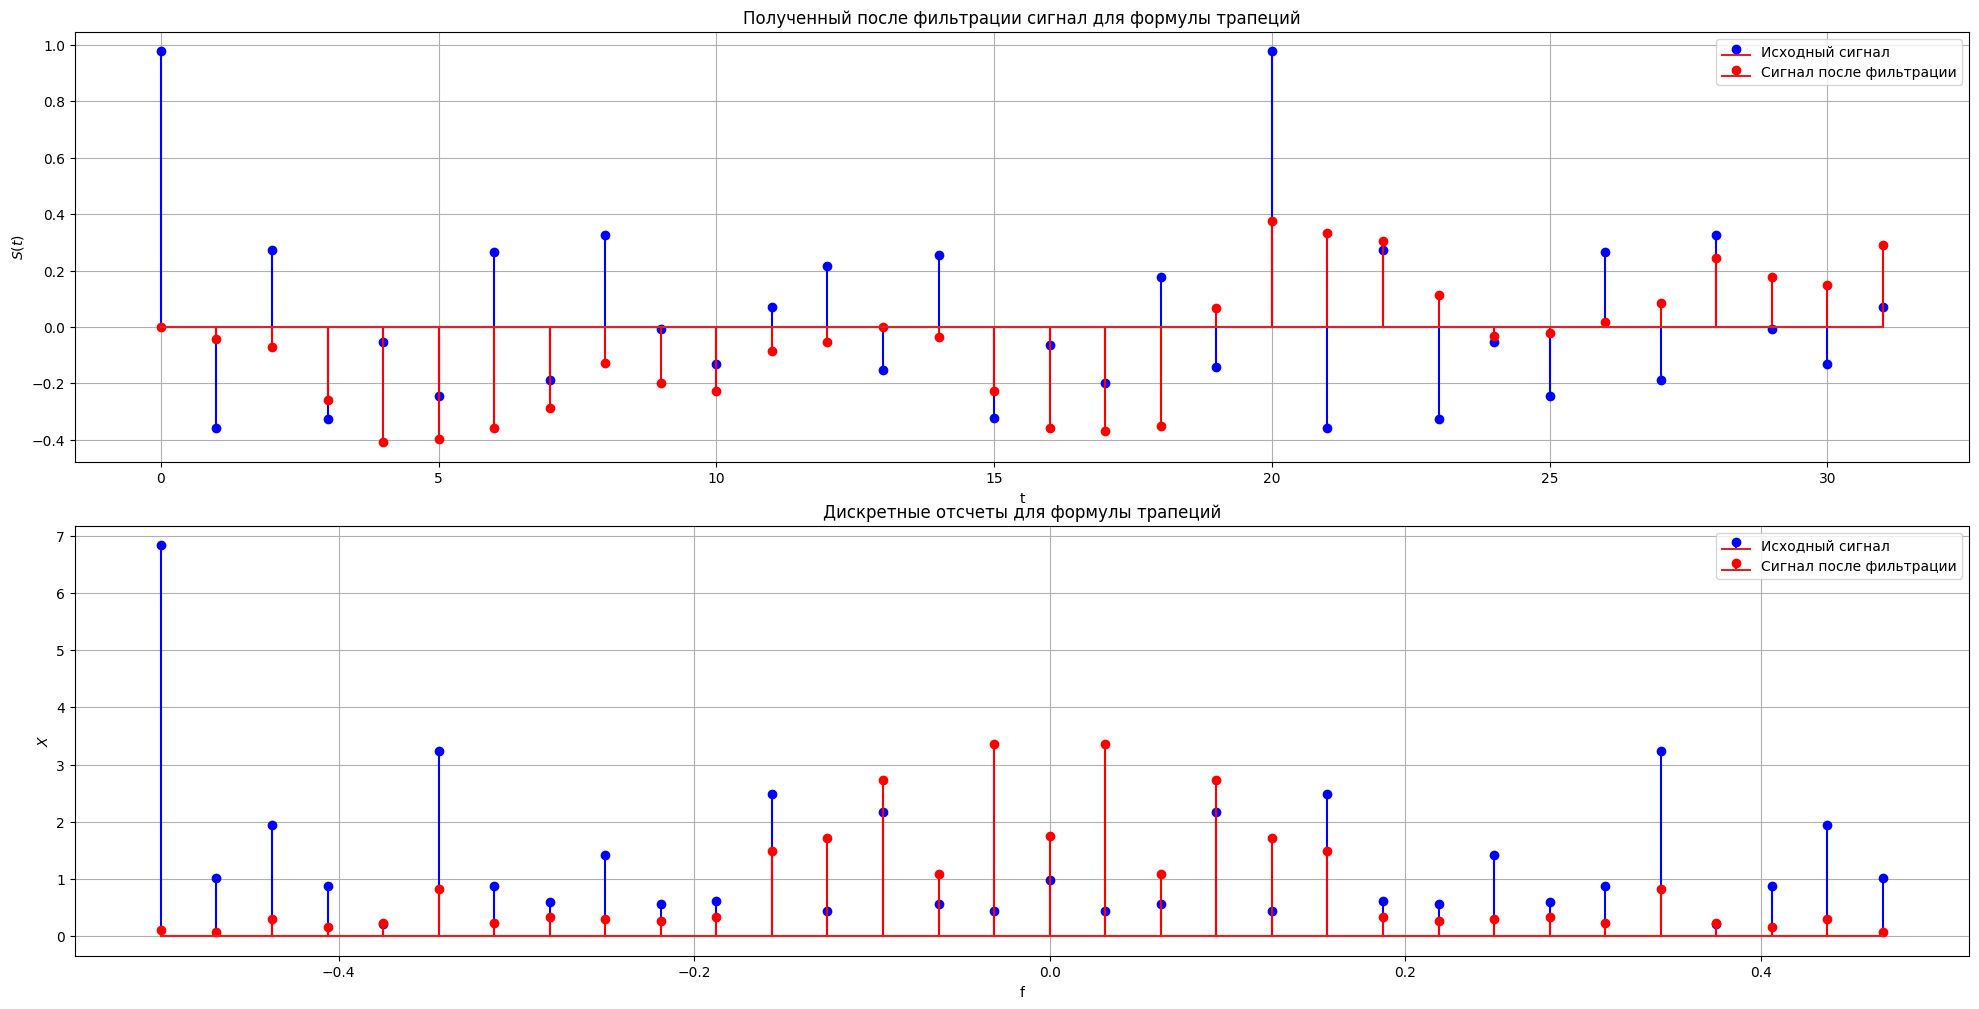

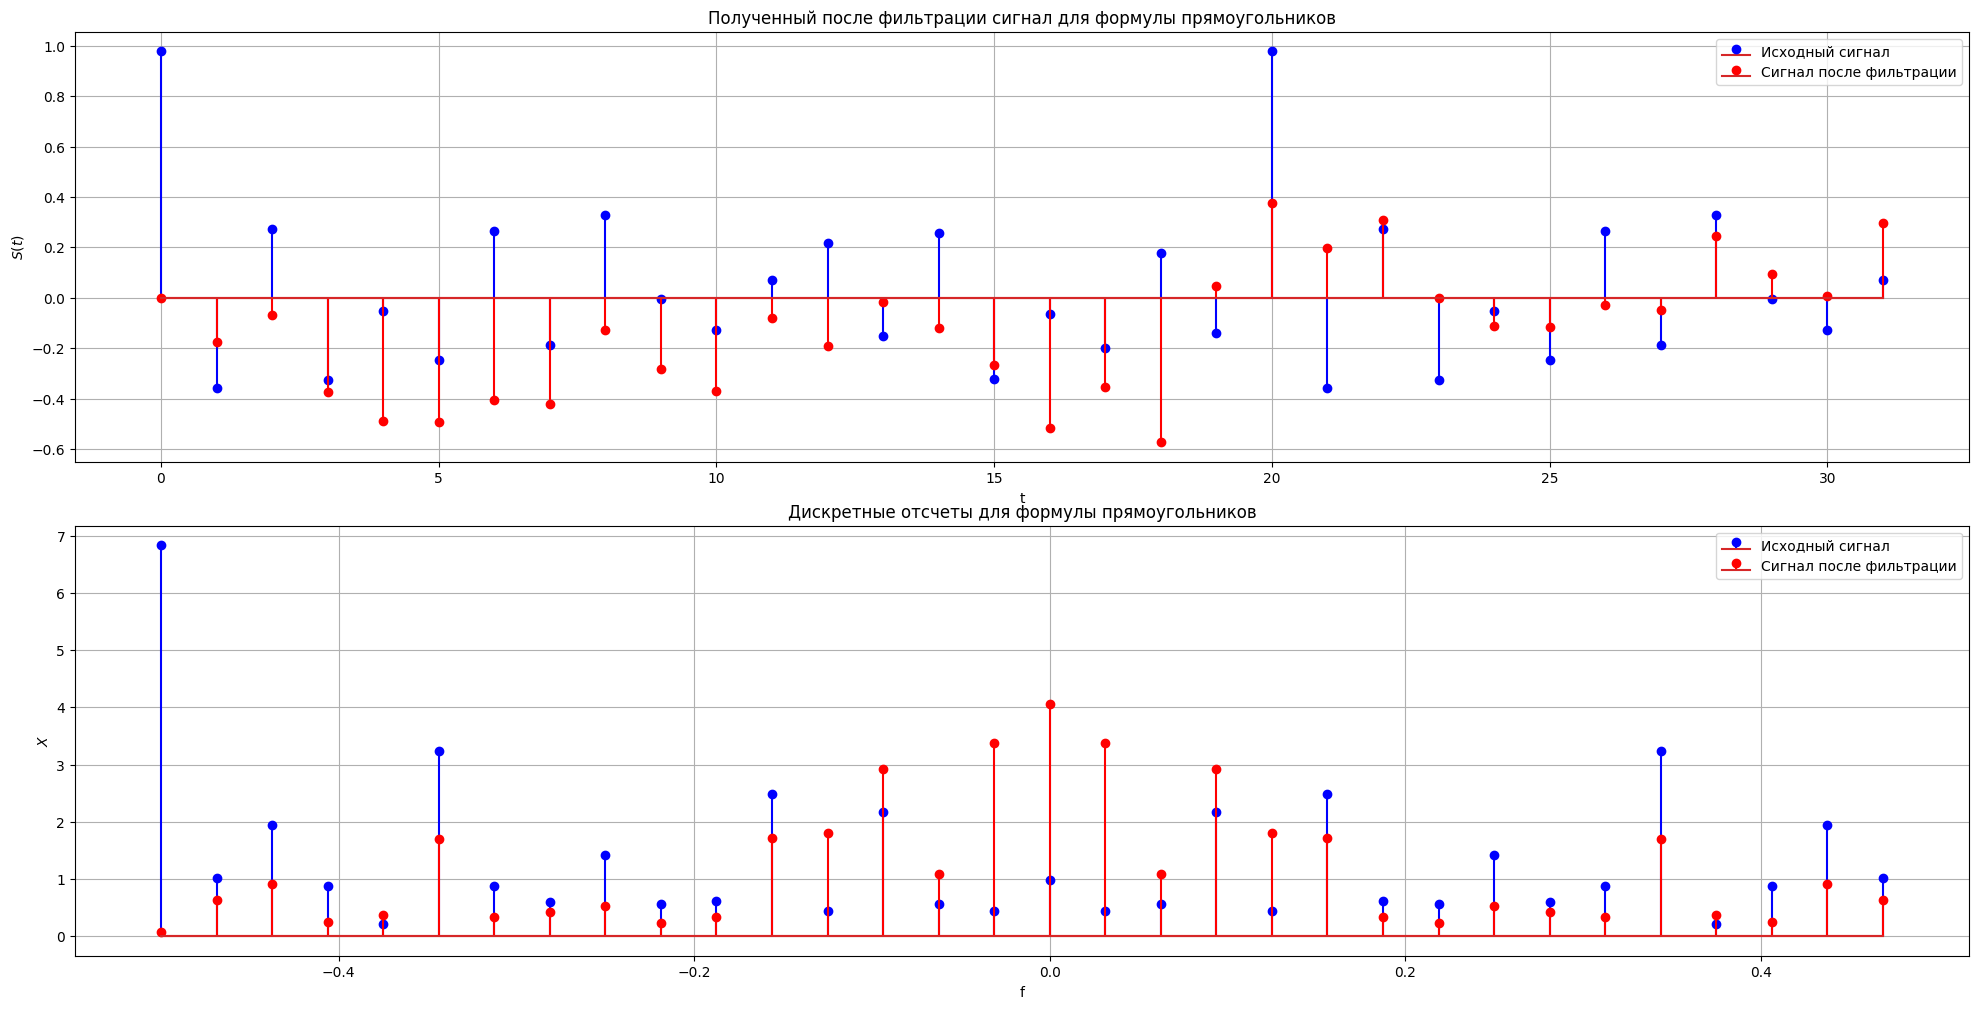

In [34]:
# построение графиков для численного интегрирования
for signal in (BaseH.simpson, BaseH.trapezoid, BaseH.rectangle):
    print_graphic(
        graphic_blocs=[
            # блок с исходным графиком и его сглаженной версией
            GraphicsBlock(
                graphics=[
                    Graphic(
                        plot_function=plt.stem,
                        x=task8_t_d,
                        # базовый сигнал
                        y=s(task8_t_d),
                        label=r'Исходный сигнал',
                    ),
                    Graphic(
                        plot_function=plt.stem,
                        x=task8_t_d,
                        # фильтрация сигнала
                        y=signal.calc(task8_t_d),
                        label=r'Сигнал после фильтрации',
                    ),
                ],
                title=f'Полученный после фильтрации сигнал для формулы {signal.label}',
                x_label='t',
                y_label=r'$S(t)$',
            ),
            # блок с дискретными отсчетами спектров исходного и отфильтрованного сигналов
            GraphicsBlock(
                graphics=[
                    Graphic(
                        plot_function=plt.stem,
                        # разложение в спектр
                        x=np.fft.fftfreq(task8_N + 1, T),
                        # преобразование фурье над базовым сигналом
                        y=abs(np.fft.fft(s(task8_t_d))),
                        label=r'Исходный сигнал',
                    ),
                    Graphic(
                        plot_function=plt.stem,
                        # разложение в спектр
                        x=np.fft.fftfreq(task8_N + 1, T),
                        # преобразование фурье над отфильтрованным сигналом
                        y=abs(np.fft.fft(signal.calc(task8_t_d))),
                        label='Сигнал после фильтрации',
                    )
                ],
                title=f'Дискретные отсчеты для формулы {signal.label}',
                x_label='f',
                y_label=r'$X$',
            ),
        ]
    )


По полученным результатам можно сделать выводы от том что:
1. При использовании формул прямоугольников и Симпсона сигнал усиливается на всей области.
2. При использовании формулы трапеций наиболее заметно увеличиваются амплитуды низких частот.

Полученные результаты соответствуют значениям  $H(\omega)$.

### Задание 9. Интерпретация результатов.

По полученным результатам можно сделать выводы о том, что:

1. Использование дискретного фильтра, соответствующего численному дифференцированию 1-го порядка оказывает подавляющий эффект.
2. Фильтры численного интегрирования, в основном, усиливают сигнал.

Полученные результаты совпадают с результатами анализа передаточных функций.


## Выводы

В результате выполнения практической работы были получены практические навыки выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).